In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dt = pd.read_csv(r'data/iris.csv')
dt.head()

,sepal_len,sepal_wid,petal_len,petal_wid,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# seaborn的五种主题

感谢：[seaborn主题风格与调色板设定
](https://blog.csdn.net/llh_1178/article/details/77923033)

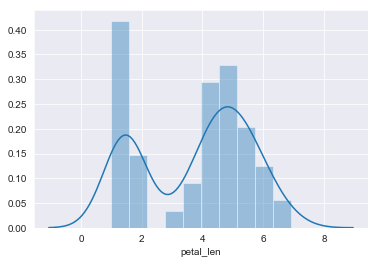

In [3]:
sns.set_style("darkgrid") # 灰色网格
sns.distplot(dt['petal_len'],bins=10)

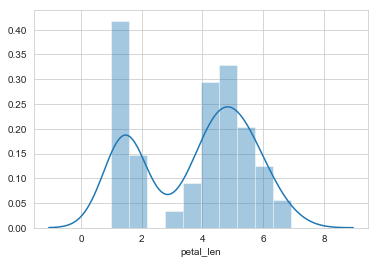

In [4]:
sns.set_style("whitegrid") # 白色网格
sns.distplot(dt['petal_len'],bins=10)

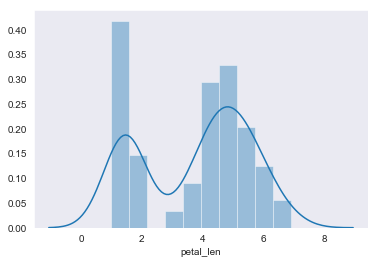

In [5]:
sns.set_style("dark") # 灰色
sns.distplot(dt['petal_len'],bins=10)

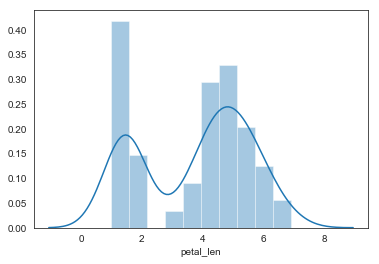

In [6]:
sns.set_style("white") # 白色
sns.distplot(dt['petal_len'],bins=10)

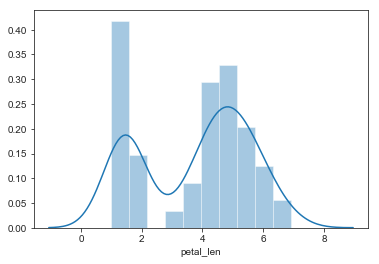

In [7]:
sns.set_style("ticks") # 没看出它与white的区别
sns.distplot(dt['petal_len'],bins=10)

# color_palette调色板

默认主题有六种变化：deep, muted, pastel, bright, dark, colorblind.       
感谢：[Choosing color palettes](http://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial)
![](http://seaborn.pydata.org/_images/color_palettes_8_0.png)

在导入seaborn时，默认的颜色循环被更改为一组10种颜色，这组颜色唤起了标准的matplotlib颜色循环，目的是为了看起来更美观。

In [8]:
sns.set()

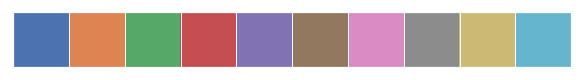

In [9]:
# 默认颜色 10种
current_palette = sns.color_palette()
sns.palplot(current_palette)

## 圆形颜色系统

当你要区分任意数量的类别而不强调任何一个时，最简单的方法是在圆形颜色空间中画均匀间隔的颜色。      
最常用的方法是使用`hls`颜色空间，这是对RGB值的简单转换。

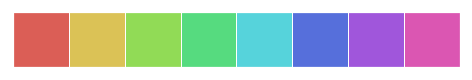

In [10]:
sns.palplot(sns.color_palette("hls",n_colors=8))

也可以使用hls_palette()函数控制亮度和饱和度

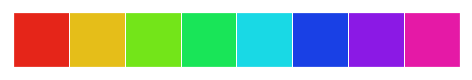

In [11]:
sns.palplot(sns.hls_palette(n_colors=8,l=0.5,s=0.8)) # l=亮度 s=饱和度

由于人类视觉系统的工作方式，在RGB水平上即使是强烈的颜色看起来也不一定那么强烈。      
我们认为黄色和绿色是相对较亮的颜色，蓝色是相对较暗的颜色，这在试图与`hls`系统保持一致时可能是一个问题。     
为了弥补这一点，`seaborn`提供了一个`husl`系统的接口(后来改名为`HSLuv`)，这也使它很容易选择均匀间隔的色调，同时保持明显的亮度和饱和度更加均匀。

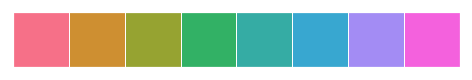

In [12]:
sns.palplot(sns.color_palette("husl", 8))
# 虽然不明白上面一段话的意思，但是husl看起来比hls更加均匀

同样有`husl_palette()`函数可以设置亮度饱和度

## 分类的Color Brewer调色板

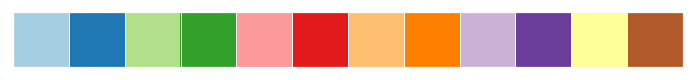

In [13]:
sns.palplot(sns.color_palette("Paired")) # paire成对的，颜色成对出现

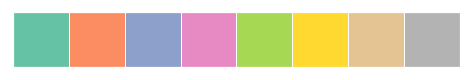

In [14]:
sns.palplot(sns.color_palette("Set2")) # 颜色差别比较大

`choose_colorbrewer_palette()`函数可以调用`Color Brewer`工具，只能在Jupyter Notebook上使用      

In [15]:
a = sns.choose_colorbrewer_palette(data_type='diverging') # 必须参数
# sequential 连续的, diverging 分散的, qualitative 定性的

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

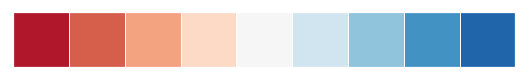

In [16]:
sns.palplot(a)

调用该工具后，可以自己调整参数得到自己满意的颜色空间。     
例如上面的例子，在调整的过程中，a的值是实时变化的。所以调整之后可以直接使用，不用再次运行

## 连续调色板

参数就是主题颜色的名字，名字后面加`s`即可。        
如果想颜色顺序反转，在名字后面加`_r`即可。     
颜色加深则最后加`_d`。

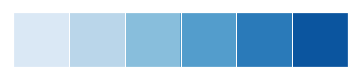

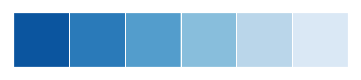

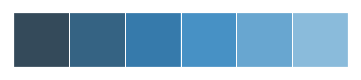

In [17]:
sns.palplot(sns.color_palette("Blues"))
sns.palplot(sns.color_palette("Blues_r"))
sns.palplot(sns.color_palette("Blues_d"))

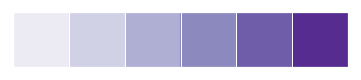

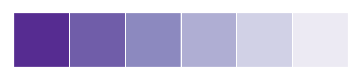

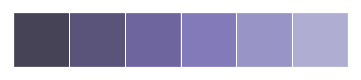

In [18]:
sns.palplot(sns.color_palette("Purples"))
sns.palplot(sns.color_palette("Purples_r"))
sns.palplot(sns.color_palette("Purples_d"))

## 自定义连续调色板

对于自定义顺序调色板的更简单的接口，您可以使用`light_palette()`或`dark_palette()`，它们都使用单一颜色，并生成一个调色板，从浅色或深色去饱和值过渡到该颜色。这些函数还伴随着`choose_light_palette()`和`choose_dark_palette()`函数，它们启动交互式小部件来创建这些调色板。

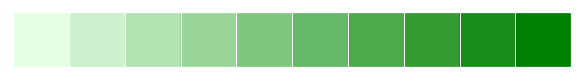

In [19]:
sns.palplot(sns.light_palette("green",n_colors=10))

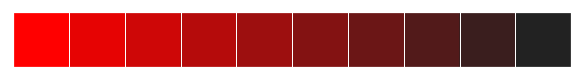

In [20]:
sns.palplot(sns.dark_palette("red",reverse=True,n_colors=10))

In [21]:
col_pal = sns.choose_light_palette()

interactive(children=(IntSlider(value=179, description='h', max=359), IntSlider(value=49, description='s', max…

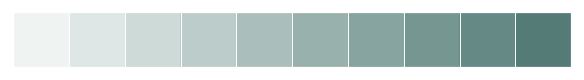

In [22]:
sns.palplot(col_pal)

具体参数请参考：[choose_light_palette](http://seaborn.pydata.org/generated/seaborn.choose_light_palette.html#seaborn.choose_light_palette)、[choose_dark_palette](http://seaborn.pydata.org/generated/seaborn.choose_dark_palette.html#seaborn.choose_dark_palette)

## 离散调色板

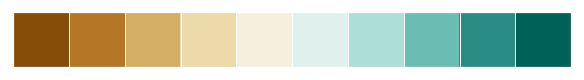

In [23]:
sns.palplot(sns.color_palette("BrBG", 10)) # brown-green

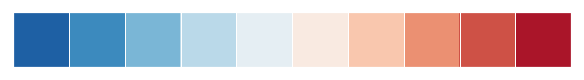

In [24]:
sns.palplot(sns.color_palette("RdBu_r", 10)) # red-blue

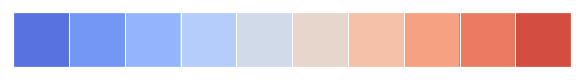

In [25]:
sns.palplot(sns.color_palette("coolwarm", 10)) # 冷色调-暖色调

## 自定义颜色列表   
如果我们有自己喜欢的颜色，可以自己定义一个颜色列表。

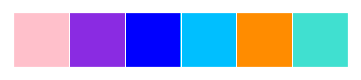

In [26]:
flatui = ["#FFC0CB", "#8A2BE2", "#0000FF", "#00BFFF", "#FF8C00", "#40E0D0"]
sns.palplot(sns.color_palette(flatui))

# 应用实例

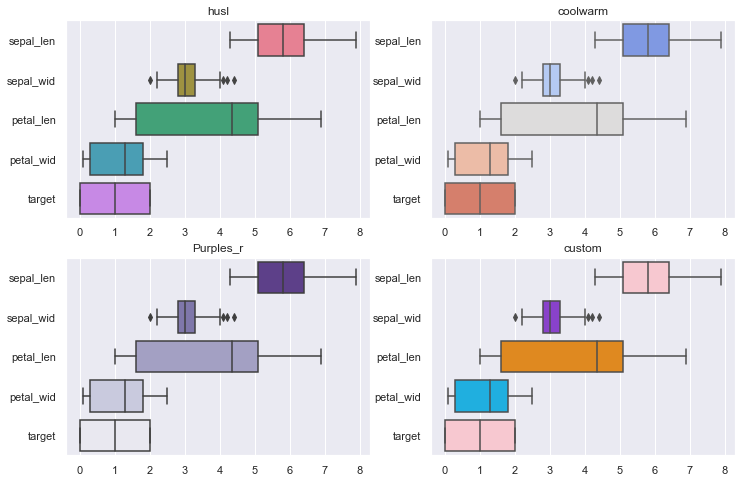

In [27]:
plt.figure(figsize=(12,8))
flatui = sns.color_palette(["#FFC0CB", "#8A2BE2", "#FF8C00", "#00BFFF"]) # 颜色种类不足时循环使用
palettes = ['husl','coolwarm','Purples_r',flatui]
pal_names = ['husl','coolwarm','Purples_r','custom']
sns.set_style("darkgrid")
for i,pal in enumerate(palettes):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=dt,palette=pal,orient="h")
    plt.title(pal_names[i])
plt.show()